In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast
from hans_prediction import *
from tqdm import tqdm, trange

## BERT (varying data usage)

#### seed 42

In [2]:
mnli_eval_acc_42 = [69.67, 75.2, 76.79, 78.32, 79.04, 79.98, 80.46, 81.25, 81.27, 82.00]
mnli_mm_eval_acc_42 = [70.84, 76.1, 78.26, 79.31, 79.98, 80.69, 81.19, 81.87, 82.06, 82.53]

hans_ent_lo_42 = np.array([96.12, 98.3, 98.4, 98.34, 98.22, 98.18, 98.4, 98.58, 98.84, 99.02])
hans_ent_sub_42 = np.array([99.1, 99.62, 99.68, 99.6, 99.62, 99.76, 99.56, 99.66, 99.62, 99.8])
hans_ent_cons_42 = np.array([93.18, 95.78, 98.24, 97.76, 97.86, 98.74, 98.98, 98.92, 99.14, 99.48])

hans_non_ent_lo_42 = np.array([1.02, 0.7, 0.8, 0.98, 1.1, 1.2, 1.38, 1.56, 1.5, 1.58])
hans_non_ent_sub_42 = np.array([3.94, 3.92, 4.12, 4.86, 4.54, 4.4, 3.16, 4.02, 3.9, 2.32])
hans_non_ent_cons_42 = np.array([3.94, 3.78, 4.04, 5.18, 5.22, 4.1, 7.04, 8.52, 7.48, 6.88])

data_pct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

#### Seed 0

In [3]:
mnli_eval_acc_0 = [71.23, 75.98, 77.86, 79.02, 80.08, 80.68, 81.33, 81.87, 82.02, 82.28]
mnli_mm_eval_acc_0 = [72.31, 76.72, 78.70, 80.08, 80.98, 81.46, 81.69, 82.03, 82.34, 82.80]

hans_ent_lo_0 = np.array([98.4, 98.7, 98.52, 98.5, 98.86, 98.7, 98.7, 98.96, 99.06, 99.12])
hans_ent_sub_0 = np.array([99.4, 99.6, 99.44, 99.44, 99.86, 99.68, 99.8, 99.74, 99.92, 99.92])
hans_ent_cons_0 = np.array([96.5, 99, 99.24, 98.74, 99.08, 98.82, 98.5, 98.92, 99.2, 98.6])

hans_non_ent_lo_0 = np.array([0.76, 0.74, 0.96, 0.88, 0.78, 0.96, 1.0, 0.98, 1.04, 1.16])
hans_non_ent_sub_0 = np.array([3.38, 2.4, 0.33, 3.82, 2.5, 3.58, 2.82, 2.4, 1.8, 2.08])
hans_non_ent_cons_0 = np.array([1.72, 2.22, 3.86, 6.4, 7.32, 6.54, 7.86, 7.86, 6.54, 9.58])

#### Seed 250

In [4]:
mnli_eval_acc_250 = [70.99, 75.4, 77.36, 78.97, 80.01, 80.84, 81.12, 81.63, 82.04, 82.32]
mnli_mm_eval_acc_250 = [71.84, 76.38, 78.62, 79.81, 80.80, 80.96, 81.80, 82.21, 82.55, 82.70]

hans_ent_lo_250 = np.array([98.26, 97.84, 97.84, 98.34, 98.3, 98.16, 98.24, 98.7, 98.82, 99.2])
hans_ent_sub_250 = np.array([99.52, 99.14, 99.2, 99.54, 99.5, 99.38, 99.64, 99.84, 99.7, 99.96])
hans_ent_cons_250 = np.array([96.28, 95.08, 98.22, 99.2, 99.4, 99.6, 99.06, 99.6, 99.62, 99.68])

hans_non_ent_lo_250 = np.array([0.62, 1.24, 1.3, 0.98, 0.06, 1.34, 1.18, 1.46, 1.46, 1.06])
hans_non_ent_sub_250 = np.array([4.34, 4.88, 5.1, 3.84, 3.98, 4.24, 3.62, 2.24, 1.9, 1])
hans_non_ent_cons_250 = np.array([2.64, 4.16, 5.52, 4.7, 5.54, 6.18, 7.56, 8.82, 6.72, 6.52])

#### Seed 500

In [5]:
mnli_eval_acc_500 = [71.49, 76.16, 78.20, 79.47, 80.19, 80.87, 81.65, 81.87, 81.91, 82.19]
mnli_mm_eval_acc_500 = [73.46, 76.89, 79.18, 80.34, 81.06, 81.51, 81.87, 82.22, 82.62, 82.99]

hans_ent_lo_500 = np.array([98.32, 98.32, 98.04, 98.42, 98.5, 98.52, 99.14, 99.16, 99.14, 99.14])
hans_ent_sub_500 = np.array([99.18, 99.46, 99.52, 99.5, 99.6, 99.76, 98.84, 99.84, 99.82, 99.88])
hans_ent_cons_500 = np.array([97.42, 99.16, 98.38, 99.4, 98.92, 99.24, 99.2, 98.9, 98.68, 98.88])

hans_non_ent_lo_500 = np.array([1.06, 1.08, 1.22, 1.16, 1.1, 1.26, 1.06, 1.16, 1.2, 1.44])
hans_non_ent_sub_500 = np.array([3.86, 3.01, 3.42, 3.28, 2.9, 2.6, 1.6, 1.88, 1.74, 1.84])
hans_non_ent_cons_500 = np.array([3.16, 6.1, 5.7, 5.34, 5.54, 6.82, 5.04, 5.98, 8.24, 8.98])

#### Seed 750

In [6]:
mnli_eval_acc_750 = [71.36, 76.35, 78.46, 79.63, 80.52, 81.31, 81.39, 81.87, 82.23, 82.46]
mnli_mm_eval_acc_750 = [73.17, 77.03, 79.01, 80.01, 80.92, 81.37, 82.19, 82.06, 82.54, 82.76]

hans_ent_lo_750 = np.array([98.96, 98.38, 98.18, 98.4, 98.54, 98.64, 98.64, 98.7, 99.04, 98.8])
hans_ent_sub_750 = np.array([99.66, 99.66, 99.46, 99.8, 99.6, 99.66, 99.76, 99.72, 99.82, 99.72])
hans_ent_cons_750 = np.array([99.04, 98.38, 98.4, 99.1, 99.18, 98.74, 98.76, 98.8, 98.94, 99.26])

hans_non_ent_lo_750 = np.array([0.22, 0.88, 1.02, 0.94, 1.12, 1.16, 1.4, 1.58, 1.22, 1.68])
hans_non_ent_sub_750 = np.array([1.8, 2.48, 3.58, 2.18, 2.98, 2.28, 2.98, 2.54, 2.24, 1.86])
hans_non_ent_cons_750 = np.array([0.54, 1.18, 2.84, 3.68, 5.74, 7.34, 5.76, 7, 5, 5.04])

In [7]:
y1, y2 = [], []
y1_mm, y2_mm = [], []
hans_ent_lo_y1, hans_ent_sub_y1, hans_ent_cons_y1 = [], [], []
hans_ent_lo_y2, hans_ent_sub_y2, hans_ent_cons_y2 = [], [], []
hans_non_ent_lo_y1, hans_non_ent_sub_y1, hans_non_ent_cons_y1 = [], [], []
hans_non_ent_lo_y2, hans_non_ent_sub_y2, hans_non_ent_cons_y2 = [], [], []

for i in range(len(data_pct)):
    y1.append(
        min(
            mnli_eval_acc_42[i], mnli_eval_acc_0[i], mnli_eval_acc_250[i], 
            mnli_eval_acc_500[i],  mnli_eval_acc_750[i]
        )
    )
    y2.append(
        max(
            mnli_mm_eval_acc_42[i], mnli_eval_acc_0[i], mnli_eval_acc_250[i], 
            mnli_eval_acc_500[i], mnli_eval_acc_750[i]
        )
    )
    y1_mm.append(
        min(
        mnli_mm_eval_acc_0[i], mnli_mm_eval_acc_250[i], mnli_mm_eval_acc_500[i],  mnli_mm_eval_acc_750[i]
        )
    )
    y2_mm.append(
        max(
        mnli_mm_eval_acc_0[i], mnli_mm_eval_acc_250[i], mnli_mm_eval_acc_500[i], mnli_mm_eval_acc_750[i]
        )
    )
    # ent min : y1
    hans_ent_lo_y1.append(
        min(
            hans_ent_lo_0[i], hans_ent_lo_42[i], hans_ent_lo_250[i], 
            hans_ent_lo_500[i], hans_ent_lo_750[i]
        )
    )
    hans_ent_sub_y1.append(
        min(
            hans_ent_sub_0[i], hans_ent_sub_42[i], hans_ent_sub_250[i],
            hans_ent_sub_500[i], hans_ent_sub_750[i]
        )
    )
    hans_ent_cons_y1.append(
        min(
            hans_ent_cons_0[i], hans_ent_cons_42[i], hans_ent_cons_250[i],
            hans_ent_cons_500[i], hans_ent_cons_750[i]
        )
    )
    # ent max: y2
    hans_ent_lo_y2.append(
        max(
            hans_ent_lo_0[i], hans_ent_lo_42[i], hans_ent_lo_250[i], 
            hans_ent_lo_500[i], hans_ent_lo_750[i]
        )
    )
    hans_ent_sub_y2.append(
        max(
            hans_ent_sub_0[i], hans_ent_sub_42[i], hans_ent_sub_250[i],
            hans_ent_sub_500[i], hans_ent_sub_750[i]
        )
    )
    hans_ent_cons_y2.append(
        max(
            hans_ent_cons_0[i], hans_ent_cons_42[i], hans_ent_cons_250[i],
            hans_ent_cons_500[i], hans_ent_cons_750[i]
        )
    )
    # non ent min : y1
    hans_non_ent_lo_y1.append(
        min(
            hans_non_ent_lo_0[i], hans_non_ent_lo_42[i], hans_non_ent_lo_250[i], 
            hans_non_ent_lo_500[i], hans_non_ent_lo_750[i]
        )
    )
    hans_non_ent_sub_y1.append(
        min(
            hans_non_ent_sub_0[i], hans_non_ent_sub_42[i], hans_non_ent_sub_250[i],
            hans_non_ent_sub_500[i], hans_non_ent_sub_750[i]
        )
    )
    hans_non_ent_cons_y1.append(
        min(
            hans_non_ent_cons_0[i], hans_non_ent_cons_42[i], hans_non_ent_cons_250[i],
            hans_non_ent_cons_500[i], hans_non_ent_cons_750[i]
        )
    )
        
    # non ent max : y2
    hans_non_ent_lo_y2.append(
        max(
            hans_non_ent_lo_0[i], hans_non_ent_lo_42[i], hans_non_ent_lo_250[i], 
            hans_non_ent_lo_500[i], hans_non_ent_lo_750[i]
        )
    )
    hans_non_ent_sub_y2.append(
        max(
            hans_non_ent_sub_0[i], hans_non_ent_sub_42[i], hans_non_ent_sub_250[i],
            hans_non_ent_sub_500[i], hans_non_ent_sub_750[i]
        )
    )
    hans_non_ent_cons_y2.append(
        max(
            hans_non_ent_cons_0[i], hans_non_ent_cons_42[i], hans_non_ent_cons_250[i],
            hans_non_ent_cons_500[i], hans_non_ent_cons_750[i]
        )
    )

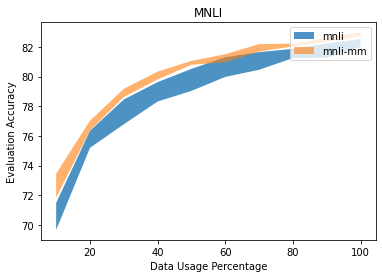

In [9]:
plt.fill_between(data_pct, y1, y2, label='mnli', alpha=0.8)
plt.fill_between(data_pct, y1_mm, y2_mm, label='mnli-mm', alpha=0.6)
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('MNLI')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/mnli_variable_data_usage.pdf')

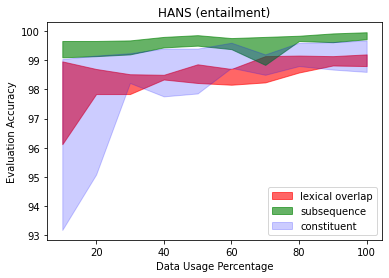

In [10]:
plt.fill_between(data_pct, hans_ent_lo_y1, hans_ent_lo_y2, color = 'red', 
                 label='lexical overlap', alpha=0.6)
plt.fill_between(data_pct, hans_ent_sub_y1, hans_ent_sub_y2, color='green',
                 label='subsequence', alpha=0.6)
plt.fill_between(data_pct, hans_ent_cons_y1, hans_ent_cons_y2, color='blue',
                 label='constituent', alpha=0.2)
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('HANS (entailment)')
plt.legend(loc='lower right')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_seeds_ent.pdf')

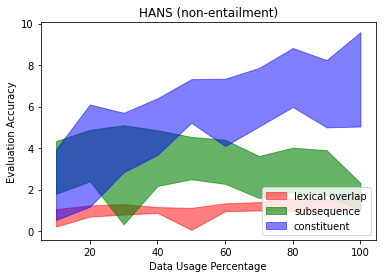

In [11]:
plt.fill_between(data_pct, hans_non_ent_lo_y1, hans_non_ent_lo_y2, color = 'red', 
                 label='lexical overlap', alpha=0.5)
plt.fill_between(data_pct, hans_non_ent_sub_y1, hans_non_ent_sub_y2, color='green',
                 label='subsequence', alpha=0.6)
plt.fill_between(data_pct, hans_non_ent_cons_y1, hans_non_ent_cons_y2, color='blue',
                 label='constituent', alpha=0.5)
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('HANS (non-entailment)')
plt.legend(loc='top left')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_seeds_non_ent.pdf')

## Clustering

### 2 percent : 7520 samples

In [8]:
two_pct_mnli = [32.09, 40.70, 46.03, 47.89, 50.24, 51.91, 53.43, 53.01, 52.8,
               54.87, 56.84, 55.46, 57.25, 58.52, 58.46, 58.85, 58.76, 58.81]
two_pct_mnli_mm = [31.93, 41.6, 46.28, 48.43, 51.23, 52.77, 55.31, 54.60, 54.38,
                  56.34, 58.58, 57.22, 59.21, 60.16, 60.23, 60.49, 60.63, 60.58]

two_pct_hans_ent_lo = np.array([0.0, 16.28, 92.7, 95.98, 94.38, 93.18, 90.4, 92.48, 95.2, 
                       95.16, 87.16, 92.02, 90.92, 93.22, 95.02, 96.86, 96.3, 91.88])
two_pct_hans_ent_sub = np.array([0.0, 18.94, 95.94, 97.78, 97.46, 96.16, 94.04, 95.64, 97.18,
                        97.08, 91.44, 95.4, 94.6, 95.7, 96.64, 98.04, 97.58, 94.78])
two_pct_hans_ent_cons = np.array([0.0, 4.78, 70.66, 69.88, 66, 64.7, 61.74, 74.42, 84.7,
                         85.76, 72.34, 82.02, 81.98, 88.16, 91.12, 93.62, 93.34, 87.9])

two_pct_hans_non_ent_lo = np.array([100.0, 83.02, 4.66, 2.28, 3.34, 5.2, 7.74, 5.84, 3.9, 3.84,
                           11.46, 6.24, 7.58, 5.62, 3.82, 2.48, 2.92, 6.5])
two_pct_hans_non_ent_sub = np.array([100.0, 81.68, 8.14, 5.7, 5.84, 7.36, 10.18, 7.46, 3.86, 4.06,
                            12.76, 7.06, 8.1, 5.26, 3.7, 2.58, 2.92, 6.42])
two_pct_hans_non_ent_cons = np.array([100.0, 95.4, 24.32, 24.7, 26.86, 26.2, 29.08, 17.42, 8.68, 7.82,
                             18.96, 10.24, 10.56, 6.9, 4.8, 3.08, 3.26, 7.28])
two_pct_epochs = list(range(1, 19))

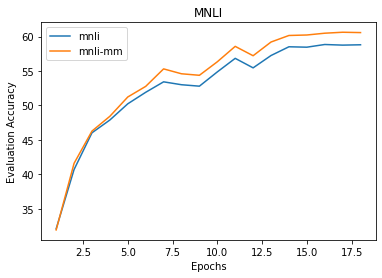

In [9]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(two_pct_epochs, two_pct_mnli, label='mnli')
plt.plot(two_pct_epochs, two_pct_mnli_mm, label='mnli-mm')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/2_pct_mnli.pdf')
plt.show()

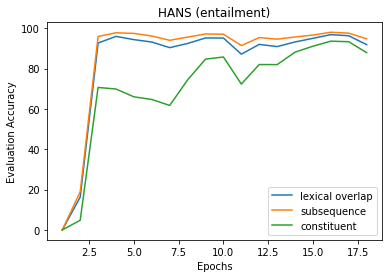

In [10]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(two_pct_epochs, two_pct_hans_ent_lo, label='lexical overlap')
plt.plot(two_pct_epochs, two_pct_hans_ent_sub, label='subsequence')
plt.plot(two_pct_epochs, two_pct_hans_ent_cons, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/2_pct_hans_ent.pdf')
plt.show()

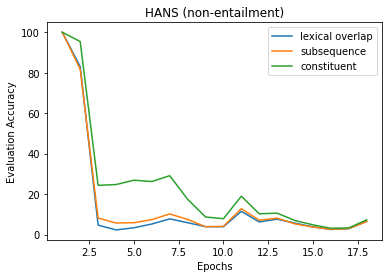

In [11]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(two_pct_epochs, two_pct_hans_non_ent_lo, label='lexical overlap')
plt.plot(two_pct_epochs, two_pct_hans_non_ent_sub, label='subsequence')
plt.plot(two_pct_epochs, two_pct_hans_non_ent_cons, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/2_pct_hans_non_ent.pdf')
plt.show()

### 16 samples: 19186 samples

In [17]:
sixteen_samples_mnli = [36.64, 53.42, 59.38, 61.80, 61.99, 61.60, 62.38, 62.45, 63.21, 64.54,
                       64.71, 65.36, 64.83, 65.01]
sixteen_samples_mnli_mm = [37.73, 54.92, 61.25, 63.26, 63.85, 63.68, 64.19, 64.73, 65.08, 66.15,
                          67.09, 67.48, 67.01, 67.01]
sixteen_samples_epochs = list(range(1, 15))

In [18]:
sixteen_samples_hans_ent_lo = np.array([0.32, 99.7, 99.86, 99.36, 99.31, 99.2, 99.16,
                                       98.4, 98.28, 98.58, 98.18, 97.9, 97.1, 98.3])
sixteen_samples_hans_ent_sub = np.array([0.3, 99.66, 100.0, 100.0, 100.0, 99.98, 99.98,
                                        99.88, 99.9, 99.94, 99.94, 99.88, 99.5, 99.82])
sixteen_samples_hans_ent_cons = np.array([0.0, 87.1, 97.06, 96.76, 96.38, 97.28, 97.52,
                                         94.48, 94.76, 96.2, 95.12, 94.54, 92.28, 94.74])

sixteen_samples_hans_non_ent_lo = np.array([99.66, 0.14, 0.0, 0.02, 0.06, 0.06, 0.08,
                                           0.26, 0.28, 0.2, 0.24, 0.34, 0.7, 0.36])
sixteen_samples_hans_non_ent_sub = np.array([99.92, 1.88, 0.16, 0.66, 1, 0.84, 0.9,
                                            1.92, 2.02, 1.68, 1.92, 2.1, 3.9, 2.5])
sixteen_samples_hans_non_ent_cons = np.array([99.98, 10.76, 2.24, 1.32, 1.52, 1.26, 1.46,
                                             3.26, 3.28, 2.38, 2.74, 3.18, 5.58, 3.28])

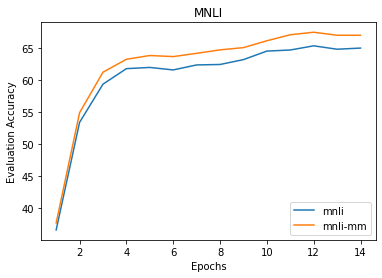

In [19]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sixteen_samples_epochs, sixteen_samples_mnli, label='mnli')
plt.plot(sixteen_samples_epochs, sixteen_samples_mnli_mm, label='mnli-mm')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/16_clusters_mnli.pdf')
plt.show()

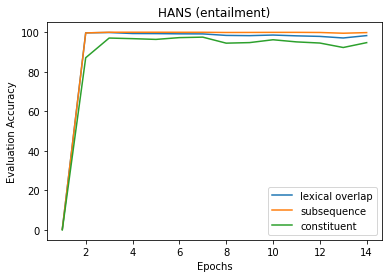

In [20]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sixteen_samples_epochs[:14], sixteen_samples_hans_ent_lo, label='lexical overlap')
plt.plot(sixteen_samples_epochs[:14], sixteen_samples_hans_ent_sub, label='subsequence')
plt.plot(sixteen_samples_epochs[:14], sixteen_samples_hans_ent_cons, label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/16_hans_ent.pdf')
plt.show()

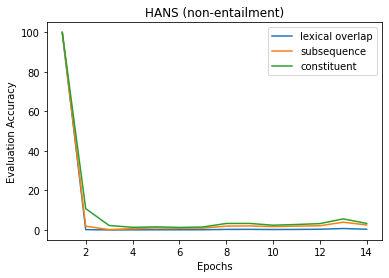

In [21]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sixteen_samples_epochs[:14], sixteen_samples_hans_non_ent_lo, label='lexical overlap')
plt.plot(sixteen_samples_epochs[:14], sixteen_samples_hans_non_ent_sub, label='subsequence')
plt.plot(sixteen_samples_epochs[:14], sixteen_samples_hans_non_ent_cons, label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/16_hans_non_ent.pdf')
plt.show()

### Centroids: 512 samples

In [5]:
centroids_samples_mnli =    [31.93, 32.01, 32.02, 32.05, 32.12, 31.81, 33.66, 37.35, 38.98, 39.64, 40.62,
                          40.48, 41.76, 40.38, 42.19, 40.80]
centroids_samples_mnli_mm = [31.91, 31.92, 31.99, 31.90, 31.92, 31.67, 32.41, 36.86, 38.74, 40.25, 41.18,
                          41.51, 41.94, 40.37, 42.41, 40.88]
centroids_samples_epochs = list(range(1, 17))

In [6]:
centroids_samples_hans_ent_lo = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.36, 36.4, 62.74, 69.52,
                                         77.76, 82.28, 93.2, 71.12, 86.4, 74.7, 84.08, 80.14, 86.9])
centroids_samples_hans_ent_sub = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.52, 32.96, 56.26, 63.26,
                                          70.22, 74.48, 85.8, 65.7, 85.52, 68.82, 84.34, 72.64, 85.82])
centroids_samples_hans_ent_cons = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 29.46, 44.34, 49.08,
                                           58.52, 62.94, 74.02, 48.94, 58.2, 50.98, 53.42, 57.9, 57.64])

centroids_samples_hans_non_ent_lo = np.array([100.0, 100.0, 100.0, 100.0, 100.0, 99.54, 62.64, 35.54, 30.3,
                                             22.44, 17.32, 7.02, 28.98, 10.94, 25.7, 12.28, 20.02, 10.36])
centroids_samples_hans_non_ent_sub = np.array([100.0, 100.0, 100.0, 100.0, 100.0, 97.84, 55.42, 36.06, 29.84,
                                              20.48, 15.22, 8.32, 25.16, 18.72, 23.7, 20.5, 18.76, 17.12])
centroids_samples_hans_non_ent_cons = np.array([100.0, 100.0, 100.0, 100.0, 100.0, 99.38, 74.16, 57.1, 48.52,
                                               36.8, 29.54, 19.12, 43.66, 34.64, 40.44, 39.68, 34.32, 34.42])

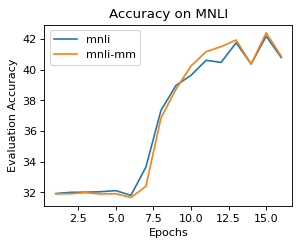

In [7]:
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(centroids_samples_epochs, centroids_samples_mnli, label='mnli')
plt.plot(centroids_samples_epochs, centroids_samples_mnli_mm, label='mnli-mm')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('Accuracy on MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/centroids_mnli.pdf')
plt.show()

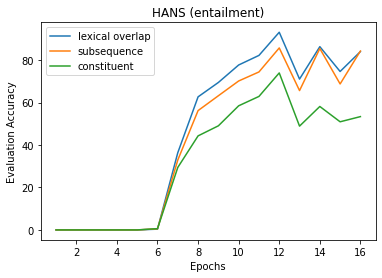

In [25]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(centroids_samples_epochs, centroids_samples_hans_ent_lo[:16], label='lexical overlap')
plt.plot(centroids_samples_epochs, centroids_samples_hans_ent_sub[:16], label='subsequence')
plt.plot(centroids_samples_epochs, centroids_samples_hans_ent_cons[:16], label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/centroids_hans_ent.pdf')
plt.show()

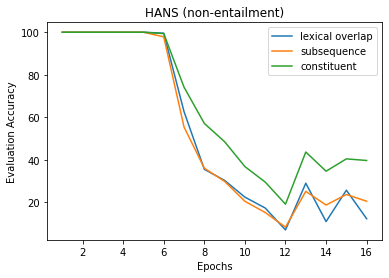

In [26]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(centroids_samples_epochs, centroids_samples_hans_non_ent_lo[:16], label='lexical overlap')
plt.plot(centroids_samples_epochs, centroids_samples_hans_non_ent_sub[:16], label='subsequence')
plt.plot(centroids_samples_epochs, centroids_samples_hans_non_ent_cons[:16], label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/centroids_hans_non_ent.pdf')
plt.show()

### Adapters

In [27]:
adapter_mnli =    [75.59, 78.09, 78.84, 79.54, 79.92, 80.41]
adapter_mnli_mm = [76.47, 78.84, 79.87, 80.53, 81.08, 81.33]
adapter_epochs = list(range(1, 7))

In [28]:
adapter_hans_ent_lo = np.array([98.9, 98.54, 98.58, 98.78, 98.8, 98.88])
adapter_hans_ent_sub = np.array([94.78, 99.88, 99.94, 99.94, 100, 99.96])
adapter_hans_ent_cons = np.array([93.34, 98.52, 98.64, 98.86, 99.08, 99.18])

adapter_hans_non_ent_lo = np.array([1, 0.78, 0.82, 0.82, 0.8, 0.8])
adapter_hans_non_ent_sub = np.array([6.82, 4.08, 3.36, 2.68, 0.2, 2.06])
adapter_hans_non_ent_cons = np.array([7.7, 2.58, 2.28, 2.52, 2.96, 3.44])

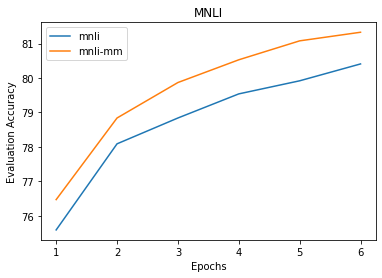

In [29]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(adapter_epochs, adapter_mnli, label='mnli')
plt.plot(adapter_epochs, adapter_mnli_mm, label='mnli-mm')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/adapter_mnli.pdf')
plt.show()

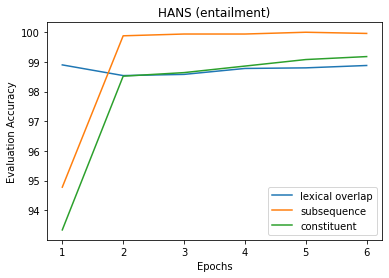

In [30]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(adapter_epochs, adapter_hans_ent_lo, label='lexical overlap')
plt.plot(adapter_epochs, adapter_hans_ent_sub, label='subsequence')
plt.plot(adapter_epochs, adapter_hans_ent_cons, label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/adapter_hans_ent.pdf')
plt.show()

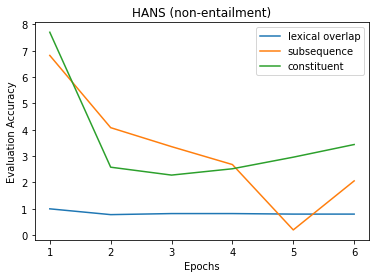

In [31]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(adapter_epochs, adapter_hans_non_ent_lo, label='lexical overlap')
plt.plot(adapter_epochs, adapter_hans_non_ent_sub, label='subsequence')
plt.plot(adapter_epochs, adapter_hans_non_ent_cons, label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/adapter_hans_non_ent.pdf')
plt.show()

## Meta Learning

In [2]:
df = pd.read_csv('/home/nlp/experiments/meta_2/mnli_hans.csv')
del df['Unnamed: 0']

In [3]:
for column in df.columns:
    for idx in range(len(df[column])):
        df[column].values[idx] = ast.literal_eval(df[column].values[idx])

In [4]:
df.columns

Index(['mnli', 'hans', 'mnli-mm'], dtype='object')

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]


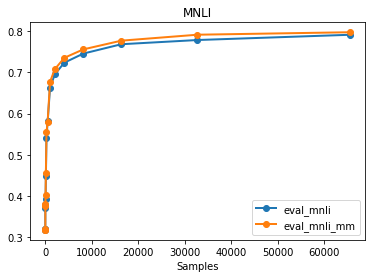

In [5]:
#plt.figure(num=None, figsize=(4, 6), dpi=80, facecolor='w', edgecolor='k')

columns = ['mnli', 'mnli-mm']
x = [2**i for i in range(1, 17)]
print(x)

eval_loss = df[column].values[0]
eval_acc = df[column].values[1]
eval_f1 = df[column].values[2]
eval_acc_and_f1 = df[column].values[3]
eval_acc_mnli = df[columns[0]].values[4]
eval_acc_mnli_mm = df[columns[1]].values[4]


#plt.plot(x, eval_loss, label = 'eval loss')
#plt.plot(x,  eval_acc, label = 'eval acc')
#plt.plot(x, eval_f1, label = 'eval f1')
#plt.plot(x, eval_acc_and_f1, label = 'eval_acc_and_f1')
plt.plot(x, eval_acc_mnli, label = 'eval_mnli', marker='o', 
         linewidth=2, markersize=6)
plt.plot(x, eval_acc_mnli_mm, label = 'eval_mnli_mm', marker='o', 
         linewidth=2, markersize=6)

plt.legend()
plt.xlabel('Samples')
# plt.ylabel('Evaluation Accuracy')
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/mnli_maml.pdf')
plt.show()

In [6]:
hans_prediction_file_names = []
for string in os.listdir('/home/nlp/experiments/meta_2/'):
    if string.startswith('hans'):
        hans_prediction_file_names.append(string)

In [7]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [39]:
hans_prediction_file_names.sort(key=natural_keys)

In [40]:
hans_prediction_file_path = []
for string in hans_prediction_file_names:
    hans_prediction_file_path.append(os.path.join(
    '/home','nlp','experiments','meta_2', string                                
    ))

In [41]:
hans_evaluation_set_file_path = os.path.join('/home', 'nlp', 'data', 'glue_data', 'hans', 
                                            'heuristics_evaluation_set.txt')
correct_dict, heuristic_list, subcase_list, template_list = process_actual_preds(hans_evaluation_set_file_path)

In [42]:
hans_ent, hans_non_ent = get_hans_preds_main(hans_evaluation_set_file_path, hans_prediction_file_path)

100%|██████████| 16/16 [00:02<00:00,  6.50it/s]


In [43]:
columns = ['entailed_lo', 'entailed_sub', 'entailed_cons',
           'non_entailed_lo', 'non_entailed_sub', 'non_entailed_cons']

In [44]:
hans_df = pd.DataFrame(columns=columns)

In [45]:
hans_data = {}
for idx in trange(len(hans_prediction_file_path)):
    file_name = hans_prediction_file_path[idx]
    num_val = hans_prediction_file_path[idx].split('/')[-1]
    num_val = int(''.join(list(filter(str.isdigit, num_val)))) 
    hans_data[num_val] = {'entailed': hans_ent[file_name],
                    'non_entailed': hans_non_ent[file_name]}

100%|██████████| 16/16 [00:00<00:00, 17439.93it/s]


In [46]:
x = list(hans_data.keys())
x = list(map(int, x))

ent_lo, ent_sub, ent_cons = [], [], []
non_ent_lo, non_ent_sub, non_ent_cons = [], [], []
for idx, data in hans_data.items():
    ent_lo.append(data['entailed']['lexical_overlap'])
    ent_sub.append(data['entailed']['subsequence'])
    ent_cons.append(data['entailed']['constituent'])
    non_ent_lo.append(data['non_entailed']['lexical_overlap'])
    non_ent_sub.append(data['non_entailed']['subsequence'])
    non_ent_cons.append(data['non_entailed']['constituent'])
    
    ent_lo = list(map(float, ent_lo))
    ent_sub = list(map(float, ent_sub))
    ent_cons = list(map(float, ent_cons))
    non_ent_lo = list(map(float, non_ent_lo))
    non_ent_sub = list(map(float, non_ent_sub))
    non_ent_cons = list(list(map(float, non_ent_cons)))


In [47]:
ent_lo, ent_sub, ent_cons = np.array(ent_lo), np.array(ent_sub), np.array(ent_cons)
non_ent_lo, non_ent_sub, non_ent_cons = np.array(non_ent_lo), np.array(non_ent_sub), np.array(non_ent_cons)

In [48]:
avg_lo = (ent_lo+non_ent_lo)/2
avg_sub = (ent_sub+non_ent_sub)/2
avg_cons = (ent_cons+non_ent_cons)/2

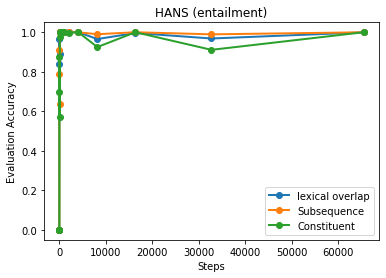

In [49]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, ent_lo, label='lexical overlap', marker='o', 
         linewidth=2, markersize=6)
plt.plot(x, ent_sub, label='Subsequence', marker='o', 
         linewidth=2, markersize=6)
plt.plot(x, ent_cons, label='Constituent', marker='o', 
         linewidth=2, markersize=6)


plt.xlabel('Steps')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_ent_maml.pdf')
plt.show()

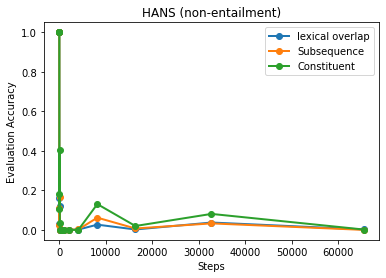

In [52]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, non_ent_lo, label='lexical overlap', marker='o', 
         linewidth=2, markersize=6)
plt.plot(x, non_ent_sub, label='Subsequence', marker='o', 
         linewidth=2, markersize=6)
plt.plot(x, non_ent_cons, label='Constituent', marker='o', 
         linewidth=2, markersize=6)


plt.xlabel('Steps')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_non_ent_maml.pdf')
plt.show()

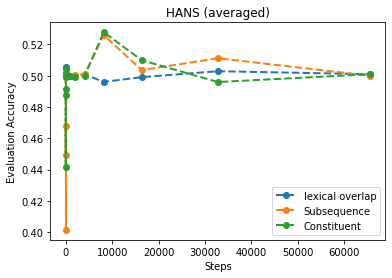

In [53]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, avg_lo, label='lexical overlap', marker='o', 
         linestyle='dashed',linewidth=2, markersize=6)
plt.plot(x, avg_sub, label='Subsequence', marker='o', 
         linestyle='dashed',linewidth=2, markersize=6)
plt.plot(x, avg_cons, label='Constituent', marker='o', 
         linestyle='dashed',linewidth=2, markersize=6)


plt.xlabel('Steps')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (averaged)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_avg_maml.pdf')
plt.show()

## Siamese

In [57]:
siamese_mnli = [31.788, 57.36, 58.42, 58.27, 57.67]
siamese_mnli_mm = [32.78, 57.54, 58.49, 58.34, 57.8]

siamese_hans_lo_ent = np.array([0.00, 63.36, 62.48, 58.34, 56.9])
siamese_hans_sub_ent = np.array([0.00, 72.42, 70.76, 67.52, 66.1])
siamese_hans_cons_ent = np.array([0.00, 68.92, 69.14, 66.46, 64.2])

siamese_hans_lo_non_ent = np.array([99.96, 37.3, 37.58, 41.5, 42.84])
siamese_hans_sub_non_ent = np.array([99.92, 38.74, 38.96, 40.4, 40.4])
siamese_hans_cons_non_ent = np.array([99.88, 31.24, 30.9, 33.3, 34.88])


siamese_hans_lo_avg = (hans_lo_ent + hans_lo_non_ent)/2
siamese_hans_sub_avg = (hans_sub_ent+hans_sub_non_ent)/2
siamese_hans_cons_avg = (hans_cons_ent+hans_cons_non_ent)/2

siamese_x = [0, 1, 2, 3, 4]

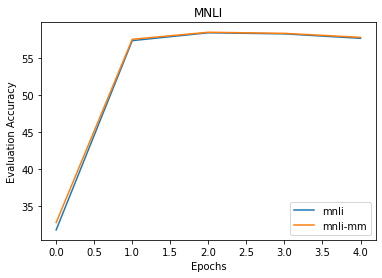

In [58]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_x, siamese_mnli, label='mnli')
plt.plot(siamese_x, siamese_mnli_mm, label='mnli-mm')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_mnli.pdf')
plt.show()

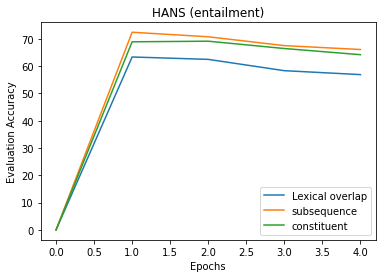

In [62]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_x, siamese_hans_lo_ent, label='Lexical overlap')
plt.plot(siamese_x, siamese_hans_sub_ent, label='subsequence')
plt.plot(siamese_x, siamese_hans_cons_ent, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_hans_ent.pdf')
plt.show()

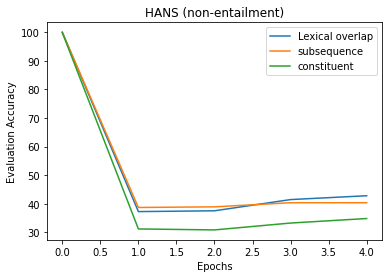

In [61]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_x, siamese_hans_lo_non_ent, label='Lexical overlap')
plt.plot(siamese_x, siamese_hans_sub_non_ent, label='subsequence')
plt.plot(siamese_x, siamese_hans_cons_non_ent, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_hans_non_ent.pdf')
plt.show()

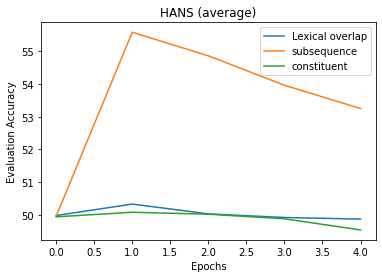

In [64]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_x, siamese_hans_lo_avg, label='Lexical overlap')
plt.plot(siamese_x, siamese_hans_sub_avg, label='subsequence')
plt.plot(siamese_x, siamese_hans_cons_avg, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (average)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_hans_avg.pdf')
plt.show()